<a href="https://colab.research.google.com/github/ashioyajotham/Daily-ML/blob/main/water_level_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#%pip install netcdf4 h5netcdf
#!pip install -q xarray 
import xarray as xr # xarray for working with labelled multi-dimensional arrays

# Load the netCDF file using xarray
file_path = 'rcp45_end_century-PCT-prct50-v0.0.nc'
ds = xr.open_dataset(file_path)

# Display the dataset structure
ds

<xarray.Dataset> Size: 558kB
Dimensions:               (stations: 23256)
Coordinates:
    station_x_coordinate  (stations) float64 186kB ...
    station_y_coordinate  (stations) float64 186kB ...
Dimensions without coordinates: stations
Data variables:
    water_level_prct      (stations) float64 186kB ...
Attributes:
    geospatial_lon_min:   150
    source:               GTSMv3.0 (D-FLOW FM) forced with EC-EARTH_DMI-HIRHAM5
    geospatial_lat_max:   72.5
    contact:              c3s422.support@deltares.nl
    time_coverage_start:  
    licence:              
    time_coverage_end:    
    geospatial_lat_min:   25
    geospatial_lon_max:   225
    summary:              Dataset with percentiles for waterlevel. Produced w...

# Exploratory Data Analysis
summary :
Dataset with percentiles for waterlevel. Produced with the Global Tide and Surge Model (GTSM) version 3.0 forced with winds and sea surface pressure from EC-EARTH_DMI-HIRHAM5 dataset for period 2071_2100.Sea-level-rise forced with forced from the RCP45 ensemble mean from the AR5 IPCC report (ref: Church et al., 2013; url: http://icdc.cen.uni-hamburg.de/1/daten/ocean/ar5-slr.html)

In [2]:
# Here are the steps to identify dimensions or coordinates:
# 1. look at the dimensions of the dataset ie ds.dims
ds.dims

# So the dimensions I get are FrozenMappingWarningOnValuesAccess({'stations': 23256}) so we have 23256 stations

# 2. look at the coordinates of the dataset ie ds.coords
ds.coords

# So these are the corrdinates I get: Coordinates:
    #station_x_coordinate  (stations) float64 186kB ...
    #station_y_coordinate  (stations) float64 186kB ... which are the coordinates of the stations

# 3. look at the variables of the dataset ie ds.data_vars
ds.data_vars

# So the variables I get are: Data variables:
#Data variables:
    #water_level_prct  (stations) float64 186kB ... which is the water level percentage

# 4. look at the attributes of the dataset ie ds.attrs
ds.attrs

# So the attributes I get are: {'geospatial_lon_min': '150',
 #'source': 'GTSMv3.0 (D-FLOW FM) forced with EC-EARTH_DMI-HIRHAM5',
 #'geospatial_lat_max': '72.5',
 #'contact': 'c3s422.support@deltares.nl',
 #'time_coverage_start': '',
 #'licence': '',
 #'time_coverage_end': '',
 #'geospatial_lat_min': '25',
 #'geospatial_lon_max': '225',
 #'summary': 'Dataset with percentiles for waterlevel. Produced with the Global Tide and Surge Model (GTSM) version 3.0 forced with winds and sea surface pressure from EC-EARTH_DMI-HIRHAM5 dataset for period 2071_2100.Sea-level-rise forced with forced from the RCP45 ensemble mean from the AR5 IPCC report (ref: Church et al., 2013; url: http://icdc.cen.uni-hamburg.de/1/daten/ocean/ar5-slr.html)'} which are the attributes of the dataset

# 5. look at the metadata of the dataset ie ds.info()
ds.info()

xarray.Dataset {
dimensions:
	stations = 23256 ;

variables:
	float64 station_x_coordinate(stations) ;
		station_x_coordinate:units = degrees_east ;
		station_x_coordinate:standard_name = longitude ;
		station_x_coordinate:long_name = longitude ;
		station_x_coordinate:short_name = longitude ;
	float64 station_y_coordinate(stations) ;
		station_y_coordinate:units = degrees_north ;
		station_y_coordinate:standard_name = latitude ;
		station_y_coordinate:long_name = latitude ;
		station_y_coordinate:short_name = latitude ;
	float64 water_level_prct(stations) ;
		water_level_prct:units = m ;
		water_level_prct:long_name = 10th water level percentile including tide and surge ;
		water_level_prct:short_name = water_level_percentile ;

// global attributes:
	:geospatial_lon_min = 150 ;
	:source = GTSMv3.0 (D-FLOW FM) forced with EC-EARTH_DMI-HIRHAM5 ;
	:geospatial_lat_max = 72.5 ;
	:contact = c3s422.support@deltares.nl ;
	:time_coverage_start =  ;
	:licence =  ;
	:time_coverage_end =  ;
	:ge

# Visualization

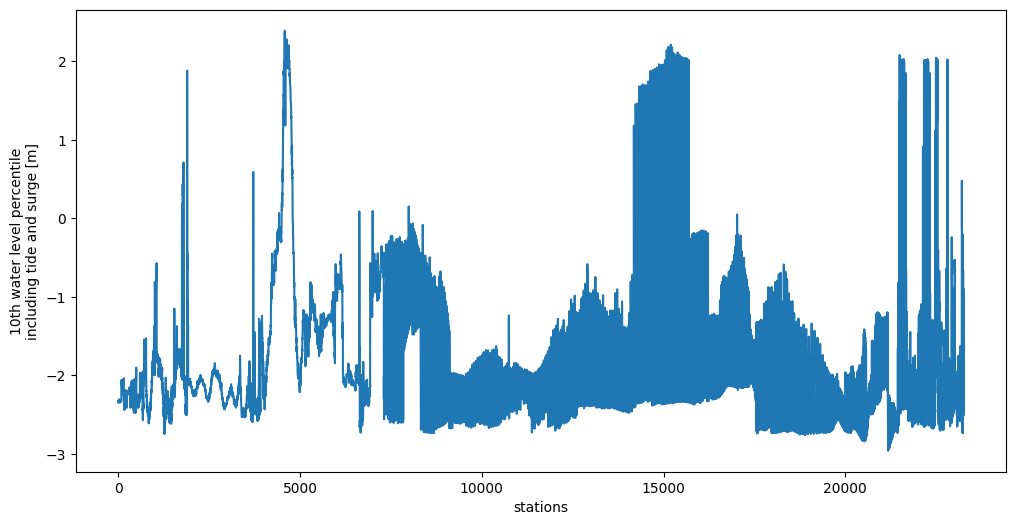

In [4]:
# Now we know the dimensions, coordinates, variables and attributes of the dataset. We can now proceed to the next step of the analysis.

# We can start analysing the dataset by plotting the water level percentage for the stations
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ds.water_level_prct.plot();


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 515.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.0 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.3 MB/s eta 0:00:00:00:01


/home/codespace/.python/current/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


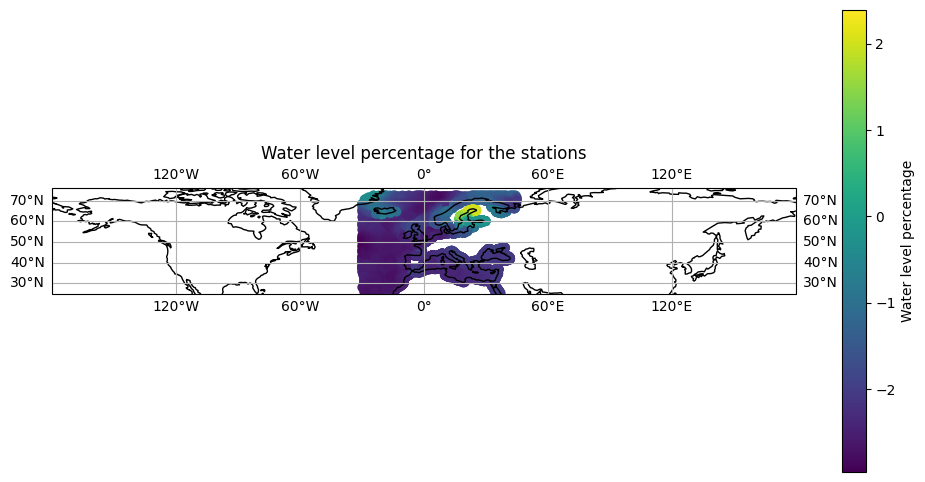

In [5]:
# Since we have plotted water percentage by stations, we can now proceed to the next step of the analysis.
# Which is plotting the water level percentage for the stations on a map
!pip install cartopy
import cartopy.crs as ccrs

# Create a map plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([150, 225, 25, 72.5])
plt.scatter(ds.station_x_coordinate, ds.station_y_coordinate, c=ds.water_level_prct, cmap='viridis', transform=ccrs.PlateCarree())
plt.colorbar(label='Water level percentage')
plt.title('Water level percentage for the stations');
plt.show();


In [6]:
# Since we have plotted water stations on the map we can now
# we will now proceed to the next step of the analysis which is to calculate the mean water level percentage for the stations
# Calculate the mean water level percentage for the stations
mean_water_level_prct = ds.water_level_prct.mean()
mean_water_level_prct

<xarray.DataArray 'water_level_prct' ()> Size: 8B
array(-1.8769824)